In [31]:
from plotting.plot_utils import get_logtable, set_rc_params
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
set_rc_params()

# Extract Data From Before Growing

In [32]:
databse_name = "fehring_growing_nn"
table_name = "incumbent_gen_2_layers"

In [33]:
smac_costs = get_logtable(databse_name, table_name, "smac_callbacks", "baselines/blackbox_only_hpo_1_layer/config/blackbox_only_hpo.yaml")

2024-07-25 11:08:30,154  | py-experimenter - WARNING  | No values given for keyfield environment_id
2024-07-25 11:08:30,154  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-07-25 11:08:30,154  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-07-25 11:08:30,154  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-07-25 11:08:30,154  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-07-25 11:08:30,155  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-07-25 11:08:30,155  | py-experimenter - WARNING  | No values given for keyfield seed
2024-07-25 11:08:30,155  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_episodes
2024-07-25 11:08:30,155  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_rounds
2024-07-25 11:08:30,155  | py-experimenter - WARNING  | No values given for keyfield total_time

2024-07-25 11:08:30,227  | py-experimenter - INFO     | 1 key(s) loaded
2024-07-25 11:08:30,375  | py-experimenter - INFO     | Connecting to gateway: apollo.ai.uni-hannover.de:22 as user 'fehring'
2024-07-25 11:08:30,453  | py-experimenter - ERROR    | Problem setting SSH Forwarder up: Couldn't open tunnel 127.0.0.1:3306 <> 127.0.0.1:3306 might be in use or destination not reachable
2024-07-25 11:08:30,454  | py-experimenter - WARNING  | Failed at creating SSH tunnel. Maybe the tunnel is already active in other process?
2024-07-25 11:08:30,454  | py-experimenter - WARNING  | An error occurred while opening tunnels.
2024-07-25 11:08:30,454  | py-experimenter - WARNING  | It looks like you didn't call the .stop() before the SSHTunnelForwarder obj was collected by the garbage collector! Running .stop(force=True)
2024-07-25 11:08:30,455  | py-experimenter - INFO     | Closing all open connections...
2024-07-25 11:08:30,455  | py-experimenter - WARNING  | Tunnels are not started. Please .s

In [34]:
# Select Row with Minimal Cost
grow_once_cost = smac_costs[smac_costs["experiment_id"] == 2]
grow_once_minimal_cost_row = smac_costs.loc[smac_costs["cost"].idxmin()]
minimal_cost_experiment_id = grow_once_minimal_cost_row["experiment_id"]
minimal_cost_trial = grow_once_minimal_cost_row["trial_number"] - 1
minimal_cost = grow_once_minimal_cost_row["cost"]

In [35]:
# Get Training Process Logtable
training_process_logtable = "training_process"
training_process_after_growth = get_logtable(databse_name, table_name, "training_process", "baselines/blackbox_only_hpo_1_layer/config/blackbox_only_hpo.yaml")

2024-07-25 11:08:30,671  | py-experimenter - WARNING  | No values given for keyfield environment_id
2024-07-25 11:08:30,671  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-07-25 11:08:30,672  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-07-25 11:08:30,672  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-07-25 11:08:30,672  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-07-25 11:08:30,672  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-07-25 11:08:30,672  | py-experimenter - WARNING  | No values given for keyfield seed
2024-07-25 11:08:30,672  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_episodes
2024-07-25 11:08:30,672  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_rounds
2024-07-25 11:08:30,673  | py-experimenter - WARNING  | No values given for keyfield total_time

In [36]:
# Select entries 
relevat_training_process_before_growth = training_process_after_growth[(training_process_after_growth["experiment_id"] == minimal_cost_experiment_id) & (training_process_after_growth["trial_number"] == minimal_cost_trial)]
relevat_training_process_before_growth

,ID,experiment_id,timestamp,worker_id,trial_number,budget,timestep,evaluated_cost,evaluated_stdev
4800,9101,2,2024-07-18 01:07:32,2,48,None,50000,-1.552,0.776541
4801,9102,2,2024-07-18 01:07:32,2,48,None,100000,-0.956,0.956684
4802,9103,2,2024-07-18 01:07:32,2,48,None,150000,-0.279,0.861724
4803,9104,2,2024-07-18 01:07:32,2,48,None,200000,-1.167,0.953332
4804,9105,2,2024-07-18 01:07:32,2,48,None,250000,-0.880,1.116620
...,...,...,...,...,...,...,...,...,...
4895,9196,2,2024-07-18 01:13:11,1,48,None,800000,1.000,0.000000
4896,9197,2,2024-07-18 01:13:12,1,48,None,850000,1.000,0.000000
4897,9198,2,2024-07-18 01:13:12,1,48,None,900000,1.000,0.000000
4898,9199,2,2024-07-18 01:13:12,1,48,None,950000,1.000,0.000000


<Axes: xlabel='timestep', ylabel='evaluated_cost'>

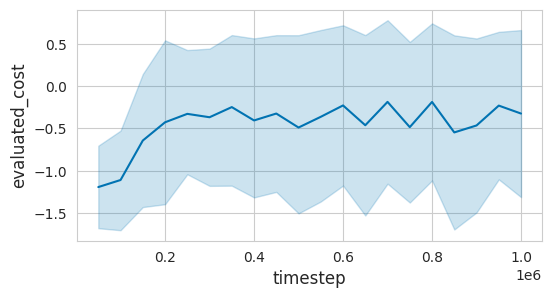

In [37]:
# SNS plot training proccess. "timestep" on x, "evalauted_cost on y"
sns.lineplot(data=relevat_training_process_before_growth, x="timestep", y="evaluated_cost")

# Add Grow Once Data

## 0.1 Noise

In [38]:
table_name = "net2deeper_grow_width_once"

In [39]:
grow_once_cost = get_logtable(databse_name, table_name, "smac_callbacks", "baselines/blackbox_only_hpo_1_layer/config/blackbox_only_hpo.yaml")
smac_grow_once_costs = grow_once_cost[grow_once_cost["experiment_id"] == 1]


2024-07-25 11:08:31,374  | py-experimenter - WARNING  | No values given for keyfield environment_id
2024-07-25 11:08:31,374  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-07-25 11:08:31,375  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-07-25 11:08:31,375  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-07-25 11:08:31,375  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-07-25 11:08:31,375  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-07-25 11:08:31,376  | py-experimenter - WARNING  | No values given for keyfield seed
2024-07-25 11:08:31,376  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_episodes
2024-07-25 11:08:31,376  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_rounds
2024-07-25 11:08:31,376  | py-experimenter - WARNING  | No values given for keyfield total_time

In [40]:
# select row with minimal cost
grow_once_minimal_cost_row = grow_once_cost.loc[smac_grow_once_costs["cost"].idxmin()]
minimal_cost_experiment_id = grow_once_minimal_cost_row["experiment_id"]
minimal_cost_trial = grow_once_minimal_cost_row["trial_number"] -1 
minimal_cost = grow_once_minimal_cost_row["cost"]


In [41]:
training_process_after_growth = get_logtable(databse_name, table_name, "training_process", "baselines/blackbox_only_hpo_1_layer/config/blackbox_only_hpo.yaml")

2024-07-25 11:08:31,911  | py-experimenter - WARNING  | No values given for keyfield environment_id
2024-07-25 11:08:31,911  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-07-25 11:08:31,911  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-07-25 11:08:31,912  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-07-25 11:08:31,912  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-07-25 11:08:31,912  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-07-25 11:08:31,912  | py-experimenter - WARNING  | No values given for keyfield seed
2024-07-25 11:08:31,912  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_episodes
2024-07-25 11:08:31,913  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_rounds
2024-07-25 11:08:31,913  | py-experimenter - WARNING  | No values given for keyfield total_time

<Axes: xlabel='timestep', ylabel='evaluated_cost'>

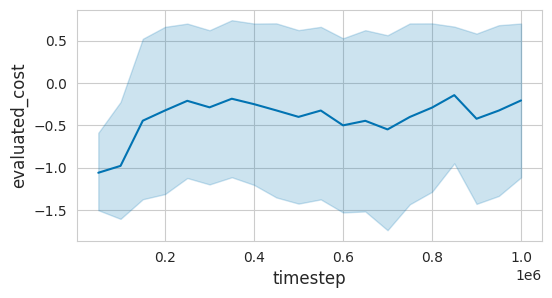

In [42]:
# Plot training process after growth
relevat_training_process_after_growth = training_process_after_growth[(training_process_after_growth["experiment_id"] == minimal_cost_experiment_id) & (training_process_after_growth["trial_number"] == minimal_cost_trial)]
sns.lineplot(data=relevat_training_process_after_growth, x="timestep", y="evaluated_cost")

2024-07-25 11:08:32,598  | py.warnings - WARNING  | /tmp/ipykernel_533618/1429544113.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevat_training_process_after_growth["timestep"] += relevat_training_process_before_growth["timestep"].max()

2024-07-25 11:08:32,598  | py.warnings - WARNING  | /tmp/ipykernel_533618/1429544113.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevat_training_process_after_growth["timestep"] += relevat_training_process_before_growth["timestep"].max()

2024-07-25 11:08

<Axes: xlabel='timestep', ylabel='evaluated_cost'>

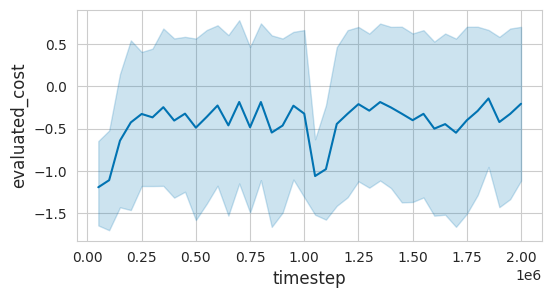

In [43]:
# Plot Combination of Before and After Growth, first concat the dataframes, and increase the timestep of the second dataframe by the maximum timestep of the first dataframe
relevat_training_process_after_growth["timestep"] += relevat_training_process_before_growth["timestep"].max()
combined_growed = pd.concat([relevat_training_process_before_growth, relevat_training_process_after_growth])
sns.lineplot(data=combined_growed, x="timestep", y="evaluated_cost")

## 0.2 Noise

In [44]:
table_name_2 = "net2deeper_grow_width_once_new"

In [45]:
grow_once_cost_2 = get_logtable(databse_name, table_name_2, "smac_callbacks", "baselines/blackbox_only_hpo_1_layer/config/blackbox_only_hpo.yaml")
grow_once_cost_2 = grow_once_cost_2[grow_once_cost_2["experiment_id"] == 2]

2024-07-25 11:08:32,925  | py-experimenter - WARNING  | No values given for keyfield environment_id
2024-07-25 11:08:32,926  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-07-25 11:08:32,926  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-07-25 11:08:32,926  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-07-25 11:08:32,926  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-07-25 11:08:32,927  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-07-25 11:08:32,927  | py-experimenter - WARNING  | No values given for keyfield seed
2024-07-25 11:08:32,927  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_episodes
2024-07-25 11:08:32,927  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_rounds
2024-07-25 11:08:32,928  | py-experimenter - WARNING  | No values given for keyfield total_time

In [46]:
grow_once_cost_2

,ID,experiment_id,timestamp,trial_number,budget,hyperparameter_str_identifier,cost
49,50,2,2024-07-24 10:44:57,1,None,"{'batch_size': 64, 'ent_coef': 0.1861694086343...",0.6454
50,51,2,2024-07-24 10:53:07,2,None,"{'batch_size': 256, 'ent_coef': 0.107882379647...",1.7328
51,52,2,2024-07-24 11:04:27,3,None,"{'batch_size': 128, 'ent_coef': 0.229283551219...",0.7846
52,53,2,2024-07-24 11:40:56,4,None,"{'batch_size': 32, 'ent_coef': 0.0017112052068...",0.3292
53,54,2,2024-07-24 12:17:04,5,None,"{'batch_size': 32, 'ent_coef': 0.2912519236095...",1.9646
54,55,2,2024-07-24 12:29:54,6,None,"{'batch_size': 128, 'ent_coef': 0.068384815938...",0.8640
55,56,2,2024-07-24 12:39:28,7,None,"{'batch_size': 256, 'ent_coef': 0.194468993693...",1.5024
56,57,2,2024-07-24 13:04:02,8,None,"{'batch_size': 64, 'ent_coef': 0.1208517263643...",1.1442
57,58,2,2024-07-24 13:15:50,9,None,"{'batch_size': 64, 'ent_coef': 0.2583484316244...",1.4330
58,59,2,2024-07-24 13:29:36,10,None,"{'batch_size': 256, 'ent_coef': 0.035920777637...",0.7634


In [47]:
# select row with minimal cost
grow_once_minimal_cost_row_2 = grow_once_cost_2.loc[grow_once_cost_2["cost"].idxmin()]
minimal_cost_experiment_id_2 = grow_once_minimal_cost_row_2["experiment_id"]
minimal_cost_trial_2 = grow_once_minimal_cost_row_2["trial_number"] -1 
minimal_cost_2  = grow_once_minimal_cost_row_2["cost"]

In [48]:
training_process_after_growth_2 = get_logtable(databse_name, table_name_2, "training_process", "baselines/blackbox_only_hpo_1_layer/config/blackbox_only_hpo.yaml")

2024-07-25 11:08:33,460  | py-experimenter - WARNING  | No values given for keyfield environment_id
2024-07-25 11:08:33,460  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-07-25 11:08:33,460  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-07-25 11:08:33,461  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-07-25 11:08:33,461  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-07-25 11:08:33,461  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-07-25 11:08:33,461  | py-experimenter - WARNING  | No values given for keyfield seed
2024-07-25 11:08:33,461  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_episodes
2024-07-25 11:08:33,462  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_rounds
2024-07-25 11:08:33,462  | py-experimenter - WARNING  | No values given for keyfield total_time

2024-07-25 11:08:33,532  | py-experimenter - INFO     | 1 key(s) loaded
2024-07-25 11:08:33,678  | py-experimenter - INFO     | Connecting to gateway: apollo.ai.uni-hannover.de:22 as user 'fehring'
2024-07-25 11:08:33,758  | py-experimenter - ERROR    | Problem setting SSH Forwarder up: Couldn't open tunnel 127.0.0.1:3306 <> 127.0.0.1:3306 might be in use or destination not reachable
2024-07-25 11:08:33,758  | py-experimenter - WARNING  | Failed at creating SSH tunnel. Maybe the tunnel is already active in other process?
2024-07-25 11:08:33,758  | py-experimenter - WARNING  | An error occurred while opening tunnels.
2024-07-25 11:08:33,759  | py-experimenter - WARNING  | It looks like you didn't call the .stop() before the SSHTunnelForwarder obj was collected by the garbage collector! Running .stop(force=True)
2024-07-25 11:08:33,759  | py-experimenter - INFO     | Closing all open connections...
2024-07-25 11:08:33,759  | py-experimenter - WARNING  | Tunnels are not started. Please .s

<Axes: xlabel='timestep', ylabel='mean_cost'>

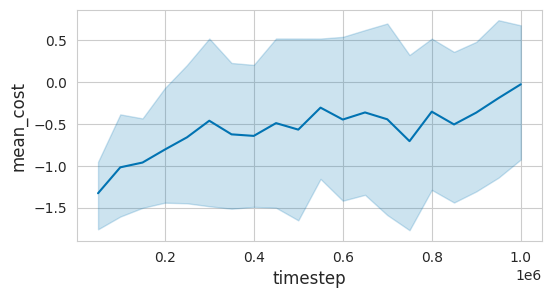

In [49]:
relevat_training_process_after_growth_2 = training_process_after_growth_2[(training_process_after_growth_2["experiment_id"] == minimal_cost_experiment_id_2) & (training_process_after_growth_2["trial_number"] == minimal_cost_trial_2)]
sns.lineplot(data=relevat_training_process_after_growth_2, x="timestep", y="mean_cost")

In [50]:
relevat_training_process_after_growth_2

,ID,experiment_id,timestamp,worker_id,trial_number,budget,hyperparameter_str_identifier,timestep,mean_cost,mean_cost_stdev,all_costs,actions_per_episode,rewards_per_episode
8700,8701,2,2024-07-24 21:28:17,2,37,None,None,50000,-1.668,0.889616,[ 1. -1.94999996 -1.96999996 -1.979999...,"{0: [[4, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4...","{0: [[0.0, 0.0, 0.0, 0.0, 0.0, -0.01, -0.01, -..."
8701,8702,2,2024-07-24 21:28:17,2,37,None,None,100000,-1.176,0.960502,[-1.91999996 0. 0. 0. ...,"{0: [[7, 7, 7, 0, 7, 4, 7, 7, 7, 7, 7, 7, 7, 7...","{0: [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
8702,8703,2,2024-07-24 21:28:18,2,37,None,None,150000,-1.378,0.902439,[-1.95999996 -1.97999996 0. -1.989999...,"{0: [[7, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","{0: [[0.0, 0.0, 0.0, 0.0, -0.01, -0.01, -0.01,..."
8703,8704,2,2024-07-24 21:28:18,2,37,None,None,200000,-1.382,0.905017,[-1.90999996 0. -1.97999996 -1.979999...,"{0: [[2, 2, 7, 7, 3, 2, 3, 3, 0, 7, 7, 7, 7, 7...","{0: [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
8704,8705,2,2024-07-24 21:28:18,2,37,None,None,250000,-1.557,0.779334,[-1.98999996 -1.99999996 -1.92999996 -1.929999...,"{0: [[3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4...","{0: [[0.0, -0.01, -0.01, -0.01, -0.01, -0.01, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8795,8796,2,2024-07-24 21:29:41,3,37,None,None,800000,1.000,0.000000,[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.],"{0: [[2, 2, 5], [5, 5, 5, 1]], 1: [[0, 1, 1, 0...","{0: [[0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0]], 1..."
8796,8797,2,2024-07-24 21:29:41,3,37,None,None,850000,0.600,0.916515,[ 1. 1. 1. 1. ...,"{0: [[5, 2, 3, 2, 2], [4, 4, 4, 1, 1, 1, 4]], ...","{0: [[0.0, 0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0..."
8797,8798,2,2024-07-24 21:29:41,3,37,None,None,900000,0.700,0.900000,[ 1. 1. 1. 1. ...,"{0: [[6, 6, 7, 6, 6], [4, 4, 1, 5, 5, 4, 5, 1]...","{0: [[0.0, 0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0..."
8798,8799,2,2024-07-24 21:29:41,3,37,None,None,950000,0.900,0.300000,[1. 1. 1. 1. 1. 1. 1. 1. 1. 0.],"{0: [[0, 0, 0, 7, 3, 7, 3, 7], [6, 1, 4, 0, 4,...","{0: [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0],..."


2024-07-25 11:08:36,917  | py.warnings - WARNING  | /tmp/ipykernel_533618/2096548941.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevat_training_process_after_growth_2["timestep"] += relevat_training_process_before_growth["timestep"].max()

2024-07-25 11:08:36,917  | py.warnings - WARNING  | /tmp/ipykernel_533618/2096548941.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevat_training_process_after_growth_2["timestep"] += relevat_training_process_before_growth["timestep"].max()

2024-07-25 1

<Axes: xlabel='timestep', ylabel='evaluated_cost'>

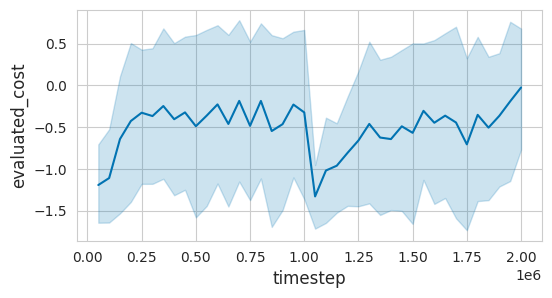

In [51]:
# Plot Combination of Before and After Growth, first concat the dataframes, and increase the timestep of the second dataframe by the maximum timestep of the first dataframe
relevat_training_process_after_growth_2["timestep"] += relevat_training_process_before_growth["timestep"].max()
relevat_training_process_after_growth_2["evaluated_cost"] = relevat_training_process_after_growth_2["mean_cost"]
combined_growed_2 = pd.concat([relevat_training_process_before_growth, relevat_training_process_after_growth_2])
sns.lineplot(data=combined_growed_2, x="timestep", y="evaluated_cost")

# Add Baseline

In [52]:
table_name = "hpo_warmstart"

In [53]:
warmstarting_table = get_logtable(databse_name, table_name, "smac_callbacks", "baselines/blackbox_only_hpo_1_layer/config/blackbox_only_hpo.yaml")
smac_cost_warmstarting = warmstarting_table[warmstarting_table["experiment_id"] == 5]

2024-07-25 11:08:37,251  | py-experimenter - WARNING  | No values given for keyfield environment_id
2024-07-25 11:08:37,251  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-07-25 11:08:37,251  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-07-25 11:08:37,251  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-07-25 11:08:37,252  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-07-25 11:08:37,252  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-07-25 11:08:37,252  | py-experimenter - WARNING  | No values given for keyfield seed
2024-07-25 11:08:37,252  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_episodes
2024-07-25 11:08:37,252  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_rounds
2024-07-25 11:08:37,252  | py-experimenter - WARNING  | No values given for keyfield total_time

In [54]:
samc_cost_warmstarting_row = smac_cost_warmstarting.loc[smac_cost_warmstarting["cost"].idxmin()]
minimal_cost_trial = samc_cost_warmstarting_row["trial_number"] -1
minimal_cost = samc_cost_warmstarting_row["cost"]

In [55]:
samc_cost_warmstarting_row

ID                                                                             115
experiment_id                                                                    5
timestamp                                                      2024-07-17 04:39:32
trial_number                                                                    49
budget                                                                        None
hyperparameter_str_identifier    {'batch_size': 32, 'ent_coef': 0.0005309372850...
cost                                                                       -0.5228
Name: 48, dtype: object

In [56]:
training_process_after_warmstarting = get_logtable(databse_name, table_name, "training_process", "baselines/blackbox_only_hpo_1_layer/config/blackbox_only_hpo.yaml")

2024-07-25 11:08:37,776  | py-experimenter - WARNING  | No values given for keyfield environment_id
2024-07-25 11:08:37,776  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-07-25 11:08:37,776  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-07-25 11:08:37,777  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-07-25 11:08:37,777  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-07-25 11:08:37,777  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-07-25 11:08:37,777  | py-experimenter - WARNING  | No values given for keyfield seed
2024-07-25 11:08:37,777  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_episodes
2024-07-25 11:08:37,778  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_rounds
2024-07-25 11:08:37,778  | py-experimenter - WARNING  | No values given for keyfield total_time

2024-07-25 11:08:37,779  | py-experimenter - INFO     | Found 11 keyfields
2024-07-25 11:08:37,779  | py-experimenter - INFO     | Found 2 resultfields
2024-07-25 11:08:37,779  | py-experimenter - INFO     | Found 5 logtables
2024-07-25 11:08:37,779  | py-experimenter - INFO     | Found logtable blackbox_incumbent_gen__configurations
2024-07-25 11:08:37,780  | py-experimenter - INFO     | Found logtable blackbox_incumbent_gen__training_process
2024-07-25 11:08:37,780  | py-experimenter - INFO     | Found logtable blackbox_incumbent_gen__smac_callbacks
2024-07-25 11:08:37,780  | py-experimenter - INFO     | Found logtable blackbox_incumbent_gen__final_evaluation_callback
2024-07-25 11:08:37,780  | py-experimenter - INFO     | Found logtable blackbox_incumbent_gen__training_losses
2024-07-25 11:08:37,780  | py-experimenter - WARNING  | No custom section defined in config
2024-07-25 11:08:37,780  | py-experimenter - WARNING  | No codecarbon section defined in config
2024-07-25 11:08:37,78

In [57]:
training_process_after_warmstarting[(training_process_after_warmstarting["experiment_id"] == 5) & (training_process_after_warmstarting["trial_number"] == minimal_cost_trial)]

,ID,experiment_id,timestamp,worker_id,trial_number,budget,hyperparameter_str_identifier,timestep,evaluated_cost,evaluated_stdev
4800,11481,5,2024-07-17 04:31:37,3,48,1000000,None,50000,-1.563000e+00,0.782663
4801,11482,5,2024-07-17 04:31:37,3,48,1000000,None,100000,-3.860000e-01,0.772117
4802,11483,5,2024-07-17 04:31:37,3,48,1000000,None,150000,-3.820000e-01,0.764327
4803,11484,5,2024-07-17 04:31:37,3,48,1000000,None,200000,1.100000e-02,0.746384
4804,11485,5,2024-07-17 04:31:37,3,48,1000000,None,250000,-9.700000e-02,0.691868
...,...,...,...,...,...,...,...,...,...,...
4895,11576,5,2024-07-17 04:39:30,0,48,1000000,None,800000,-1.920000e-01,0.576000
4896,11577,5,2024-07-17 04:39:30,0,48,1000000,None,850000,-3.860000e-01,1.093590
4897,11578,5,2024-07-17 04:39:30,0,48,1000000,None,900000,8.940700e-09,1.095450
4898,11579,5,2024-07-17 04:39:30,0,48,1000000,None,950000,2.000000e-01,0.400000


<Axes: xlabel='timestep', ylabel='evaluated_cost'>

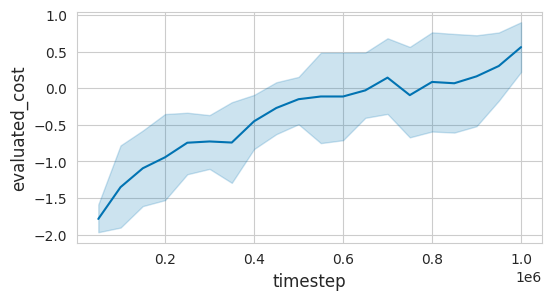

In [58]:
# Plot training process after warmstarting
training_process_after_warmstarting = training_process_after_warmstarting[(training_process_after_warmstarting["experiment_id"] == 5) & (training_process_after_warmstarting["trial_number"] == minimal_cost_trial)]
sns.lineplot(data=training_process_after_warmstarting, x="timestep", y="evaluated_cost")

<Axes: xlabel='timestep', ylabel='evaluated_cost'>

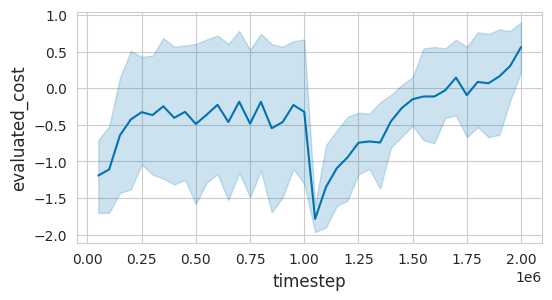

In [59]:
# Plot Combination of Before and After Growth, first concat the dataframes, and increase the timestep of the second dataframe by the maximum timestep of the first dataframe
training_process_after_warmstarting["timestep"] += training_process_after_warmstarting["timestep"].max()
combined_warmstarted = pd.concat([relevat_training_process_before_growth, training_process_after_warmstarting])
sns.lineplot(data=combined_warmstarted, x="timestep", y="evaluated_cost")

# Compare Warmstarting and Growth

<Axes: xlabel='timestep', ylabel='evaluated_cost'>

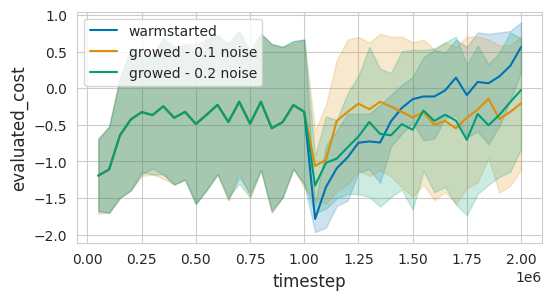

In [69]:
import seaborn as sns
sns.lineplot(data=combined_warmstarted, x="timestep", y="evaluated_cost", label="warmstarted")
sns.lineplot(data=combined_growed, x="timestep", y="evaluated_cost", label="growed - 0.1 noise")
sns.lineplot(data=combined_growed_2, x="timestep", y="evaluated_cost", label="growed - 0.2 noise")

In [64]:
# Assert that the three combined once are not the same before 1.000.000
before_1000000_warmed = combined_warmstarted[combined_warmstarted["timestep"] <= 1000000]
before_1000000_growed = combined_growed[combined_growed["timestep"] <= 1000000]
before_1000000_growed_2 = combined_growed_2[combined_growed_2["timestep"] <= 1000000]

In [65]:
pd.DataFrame.equals(before_1000000_warmed, before_1000000_growed)

True

In [68]:
pd.DataFrame.equals(before_1000000_warmed[["timestep", "evaluated_cost"]], before_1000000_growed_2[["timestep", "evaluated_cost"]])

True